In [109]:
from tkinter import Tk
from tkinter import filedialog as fd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from functions import *

In [108]:
def to_pandas(input_filepath):
    # Loads the text into a list
    with open(input_filepath, 'r', encoding="utf8") as f:
        lines = f.readlines()
        f.close()

    if ':' not in lines[0][20:]:
        lines.remove(lines[0])

    chat_name = input_filepath[input_filepath.rfind('WhatsApp Chat'):]

    message_dict = transcript_to_dictionary(chat_name, lines)

    return pd.DataFrame(message_dict)

def transcript_to_dictionary(chat_name, lines):

    message_dict = {
        'timestamp': [],
        'chat_name': [],
        'sender': [],
        'contents': []
    }

    current_message = ['timestamp', 'chat_name', 'sender', 'contents']

    current_message[0] = lines[0][:17]
    line = lines[0][20:]
    current_message[1] = chat_name
    current_message[2] = line[:line.find(':')]
    line = line[line.find(':') + 2:]
    current_message[3] = line

    lines.remove(lines[0])

    for line in lines:
        if len(line) > 19 and line[2] == '/' and ':' in line[20:]:
            message_dict['timestamp'].append(current_message[0])
            message_dict['chat_name'].append(current_message[1])
            message_dict['sender'].append(current_message[2])
            message_dict['contents'].append(current_message[3])

            current_message = ['timestamp', 'chat_name', 'sender', 'contents']

            current_message[0] = line[:17]
            line = line[20:]

            current_message[1] = chat_name

            current_message[2] = line[:line.find(':')]
            line = line[line.find(':') + 2:]

            current_message[3] = line

        else:
            current_message[3] += line

    message_dict['timestamp'].append(current_message[0])
    message_dict['chat_name'].append(current_message[1])
    message_dict['sender'].append(current_message[2])
    message_dict['contents'].append(current_message[3])

    return message_dict

def process_transcript():
    root = Tk()
    root.withdraw()

    input_path = fd.askopenfilename()

    return to_pandas(input_path)


In [110]:
def to_ymd_date (timestamp):
    day = timestamp[0:2]
    month = timestamp[3:5]
    year = timestamp[6:10]
    return f'{year}-{month}-{day}'

def to_dmy_date (timestamp):
    day = timestamp[8:10]
    month = timestamp[5:7]
    year = timestamp[:4]
    return f'{day}-{month}-{year}'

In [111]:
messages = process_transcript()

In [126]:
messages.head()

,timestamp,chat_name,sender,contents
0,"12/11/2022, 09:34",WhatsApp Chat with Ema.txt,Lobel Marunić,Sretan rođendaaan! 🥳🥳🥳\n
1,"12/11/2022, 09:40",WhatsApp Chat with Ema.txt,Ema,Hvala to ☺️\n
2,"12/11/2022, 09:40",WhatsApp Chat with Ema.txt,Ema,*ti\n
3,"12/11/2022, 10:03",WhatsApp Chat with Ema.txt,Lobel Marunić,Kakav je osjećaj imati 15?\n
4,"12/11/2022, 10:03",WhatsApp Chat with Ema.txt,Ema,Nikako drugačiji od 14 😂\n


In [46]:
messages = messages.sort_values("contents", ascending=True, key=lambda col: col.str.len())

In [121]:
messages = messages.sort_index()

In [ ]:
result = messages.iloc[10936]['contents']
print(result)

In [49]:
messages = messages.reset_index(drop=True)

In [50]:
messages = messages.sort_values("timestamp", ascending=True)

In [93]:
from datetime import datetime

date_dict = {
        'date': [],
        'number_of_messages': []
}

for i in pd.date_range(start=to_ymd_date(messages.iloc[0]['timestamp']),end=to_ymd_date(messages.iloc[-1]['timestamp'])):
    date_dict['date'].append(to_dmy_date(str(i)[:10]))
    date_dict['number_of_messages'].append(0)

messages = messages.reset_index(drop=True)

for index, row in messages.iterrows():
    date_dict['number_of_messages'][date_dict['date'].index(to_dmy_date(to_ymd_date(row['timestamp'])))] += 1

In [127]:
# Zoome time

from datetime import datetime

date_dict = {
        'date': [],
        'number_of_messages': []
}

starting_date = '12/11/2022'
earliest = to_ymd_date(messages.iloc[0]['timestamp'])

for i in pd.date_range(start='12/11/2022',end=to_ymd_date(messages.iloc[-1]['timestamp'])):
    date_dict['date'].append(to_dmy_date(str(i)[:10]))
    date_dict['number_of_messages'].append(0)

messages = messages.reset_index(drop=True)

for index, row in messages.iterrows():
    if to_dmy_date(to_ymd_date(row['timestamp'])) in date_dict['date']:
        date_dict['number_of_messages'][date_dict['date'].index(to_dmy_date(to_ymd_date(row['timestamp'])))] += 1

In [128]:
dates = pd.DataFrame(date_dict)

dates = dates.set_index('date')

dates.sort_values("number_of_messages", ascending=True)

,number_of_messages
date,
11-12-2022,0
30-05-2023,0
31-05-2023,0
01-06-2023,0
02-06-2023,0
...,...
06-11-2023,580
18-11-2023,632
28-10-2023,663


<Axes: xlabel='date'>

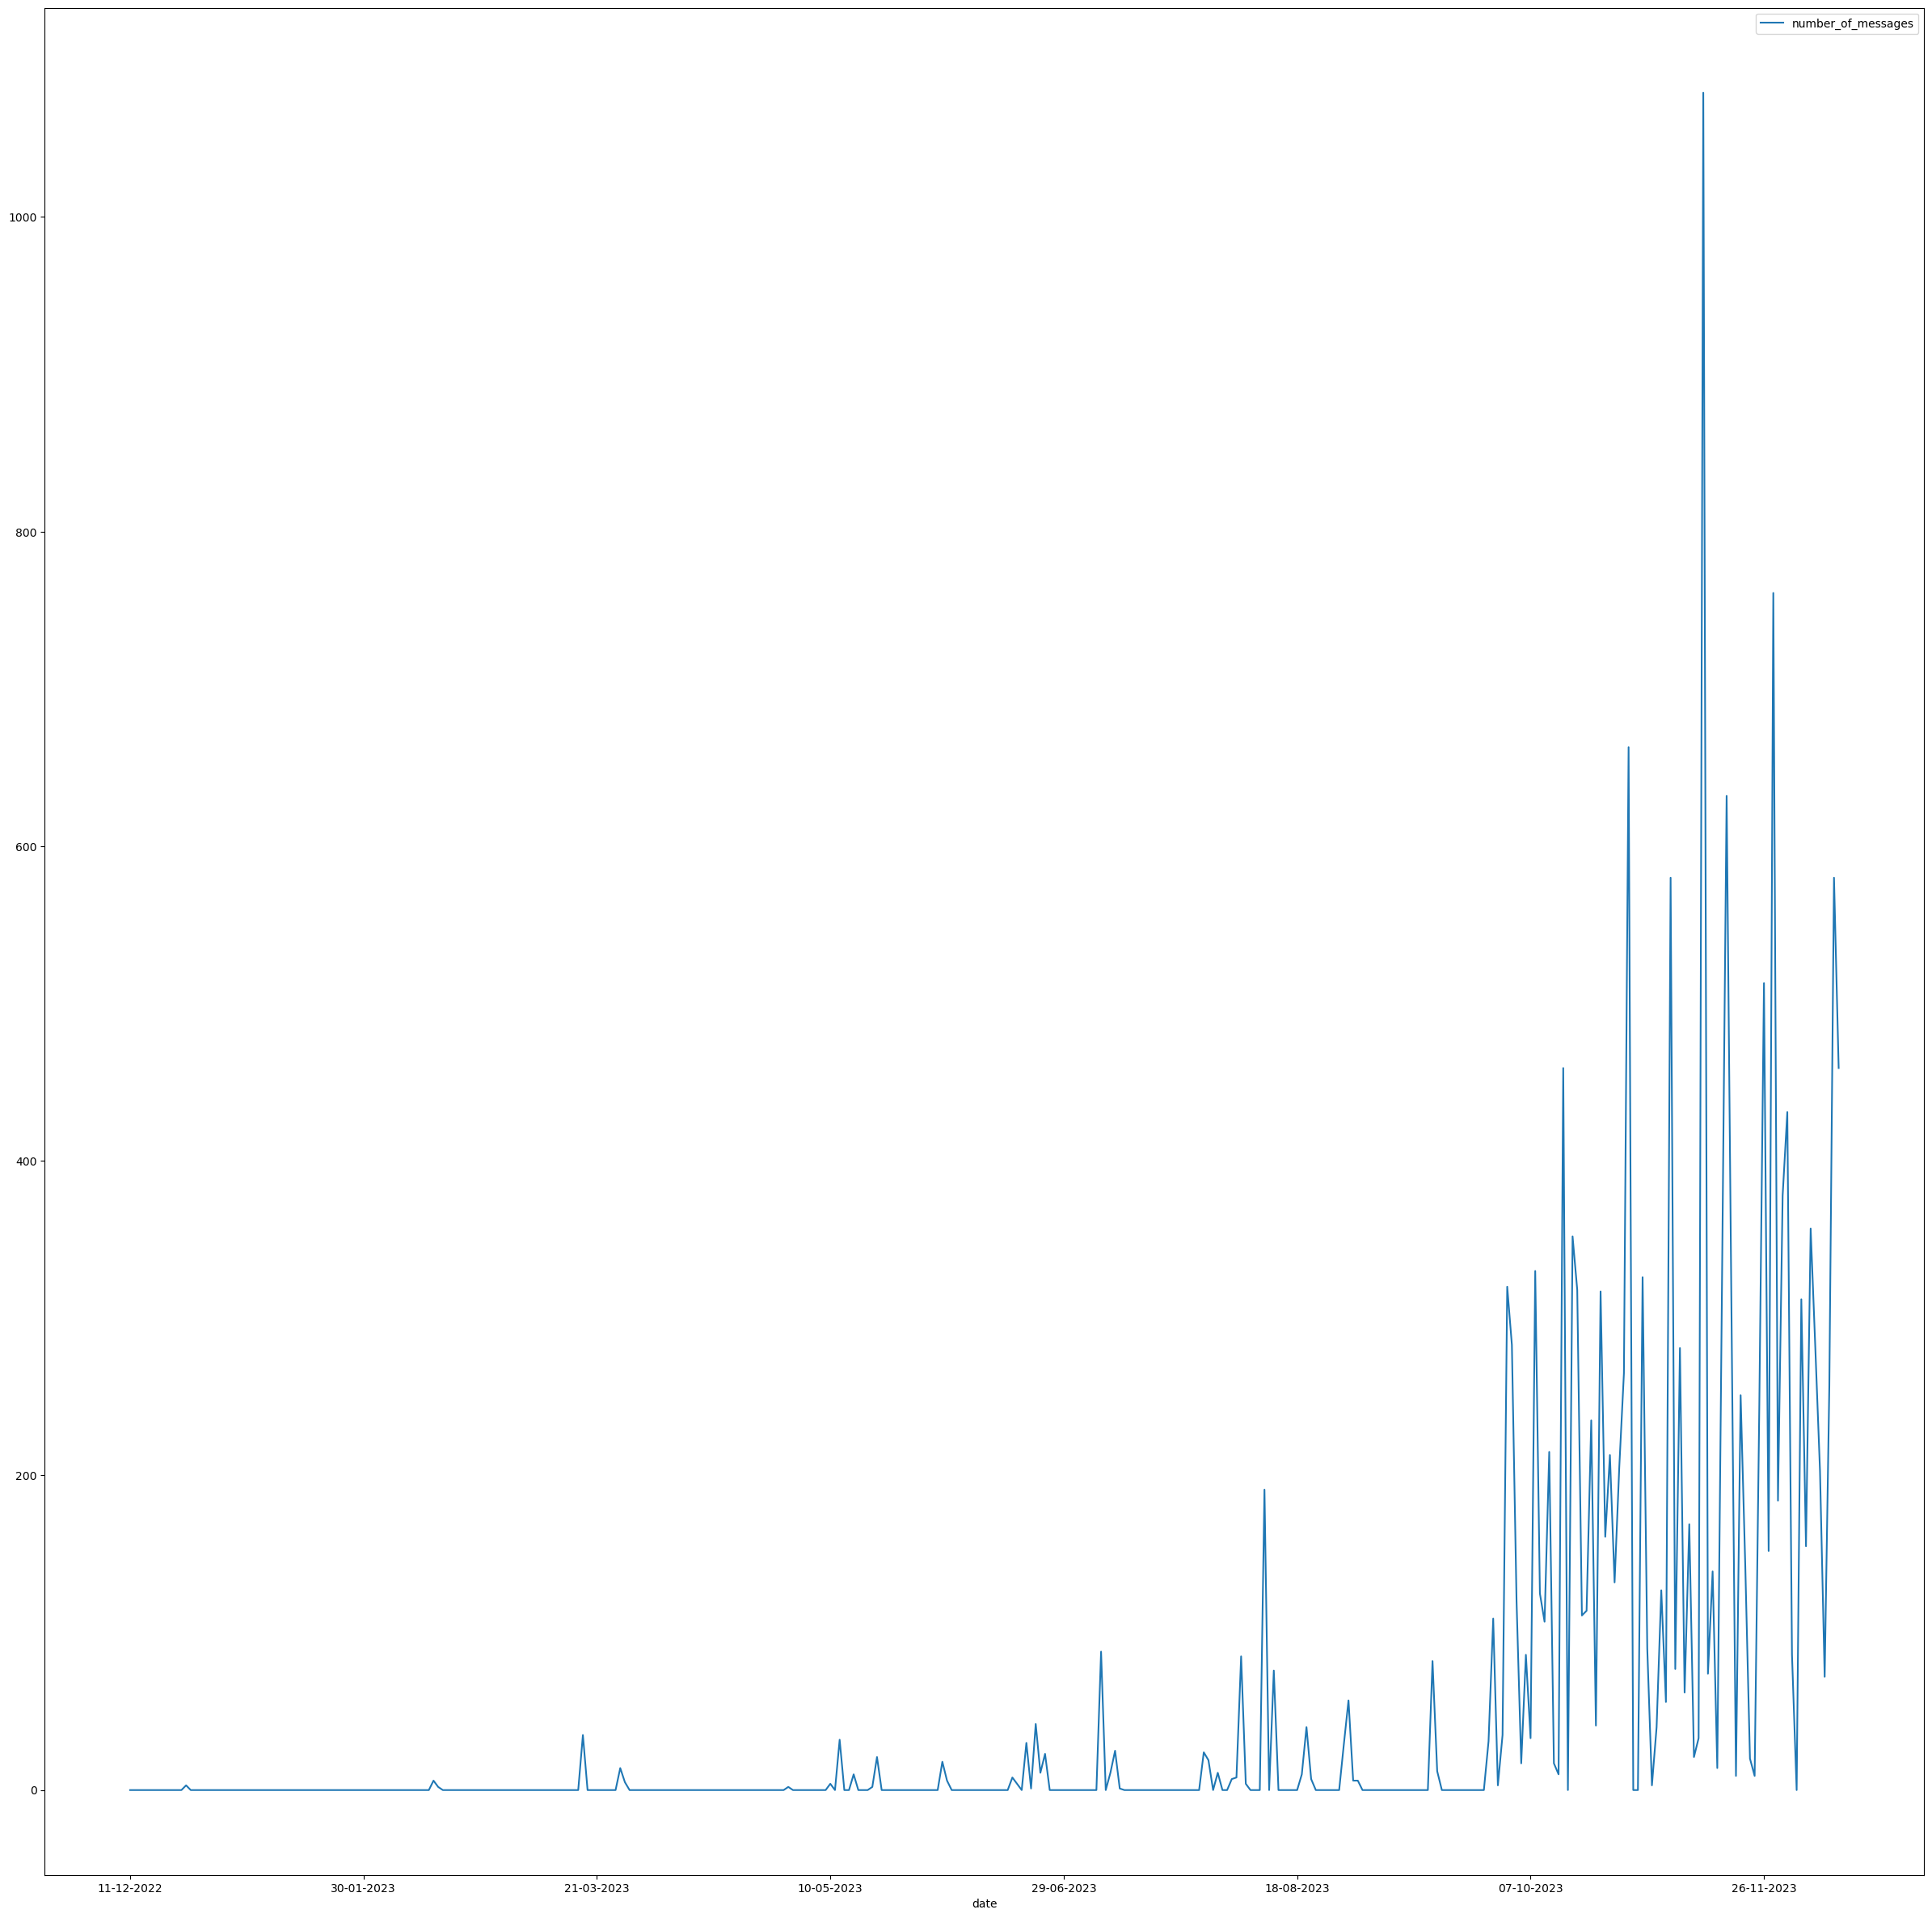

In [129]:
dates.plot(figsize=(30,30))